# 감성분석 결과와 주가 데이터 비교

In [1]:
import pandas as pd

a = pd.read_csv("../data/project/predicted_두산로보틱스_2023_01.csv")
b = pd.read_csv("../data/project/predicted_두산로보틱스_2023_02.csv")
c = pd.read_csv("../data/project/predicted_두산로보틱스_2023_03.csv")
d = pd.read_csv("../data/project/predicted_두산로보틱스_2023_04.csv")
e = pd.read_csv("../data/project/predicted_두산로보틱스_2023_05.csv")
f = pd.read_csv("../data/project/predicted_두산로보틱스_2023_06.csv")
g = pd.read_csv("../data/project/predicted_두산로보틱스_2023_07.csv")
h = pd.read_csv("../data/project/predicted_두산로보틱스_2023_08.csv")
i = pd.read_csv("../data/project/predicted_두산로보틱스_2023_09.csv")
j = pd.read_csv("../data/project/predicted_두산로보틱스_2023_10.csv")
k = pd.read_csv("../data/project/predicted_두산로보틱스_2023_11.csv")
l = pd.read_csv("../data/project/predicted_두산로보틱스_2023_12.csv")

combined_df = pd.concat([a, b, c, d, e, f, g, h, i, j, k, l])

combined_df = combined_df.drop(columns=["Unnamed: 0"], errors="ignore")

combined_df.to_csv("../data/project/predicted_두산로보틱스_2023.csv", index=False)

## 감성분석 결과 데이터프레임

In [57]:
import koreanize_matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

months = ['1월', '2월', '3월', '4월', '5월', '6월',
           '7월', '8월', '9월', '10월', '11월', '12월']
company = "두산로보틱스"

sentiment_result = pd.read_csv("../data/project/predicted_두산로보틱스_2023.csv") # 감성분석 결과 csv파일 읽어오기
sentiment_result['date'] = pd.to_datetime(sentiment_result['date'])
sentiment_result['month'] = sentiment_result['date'].dt.month

sentiments_data = []

for index, row in sentiment_result.iterrows():
    
    month = row['month']
    prediction = row['prediction']
    score = row['score']
   
    sentiments_data.append([month, company, prediction, score])

sentiments_df = pd.DataFrame(sentiments_data, columns=['month', 'company', 'prediction', 'score'])

sentiments_df

,month,company,prediction,score
0,1,두산로보틱스,악재,6.192574
1,1,두산로보틱스,호재,6.643685
2,1,두산로보틱스,중립,3.940692
3,1,두산로보틱스,호재,3.255588
4,1,두산로보틱스,중립,2.674440
...,...,...,...,...
1384,12,두산로보틱스,중립,6.459133
1385,12,두산로보틱스,악재,3.962098
1386,12,두산로보틱스,중립,5.614414
1387,12,두산로보틱스,중립,6.379447


In [58]:
# 감성에 따른 가중치 매핑
weights = {'호재': 1, '악재': -1, '중립': 0}
sentiments_df['total'] = sentiments_df['prediction'].map(weights) * sentiments_df['score']
sentiments_df['month'] = sentiments_df['month'].astype(str) + '월'


df_monthly_total = sentiments_df.groupby(['month', 'company'])['total'].sum().unstack()
df_monthly_total = df_monthly_total.reindex(months)

df_monthly_total

company,두산로보틱스
month,
1월,57.575712
2월,227.848548
3월,305.309981
4월,199.749522
5월,175.707714
6월,200.704671
7월,295.673553
8월,144.809557
9월,533.137894


In [59]:
sentiments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month       1389 non-null   object 
 1   company     1389 non-null   object 
 2   prediction  1389 non-null   object 
 3   score       1389 non-null   float64
 4   total       1389 non-null   float64
dtypes: float64(2), object(3)
memory usage: 54.4+ KB


In [8]:
import FinanceDataReader as fdr

df_krx = fdr.StockListing('KRX')
doosan = df_krx[df_krx["Name"].isin(["두산로보틱스"])]
doosan

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
64,454910,KR7454910001,두산로보틱스,KOSPI,,82500,2,-500,-0.6,82100,83900,81000,545311,45029095300,5347648350000,64819980,STK


In [11]:
ds_stock = fdr.DataReader('454910', '2023-01-01', '2023-12-31')
ds_stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-10-05,59100,67600,46450,51400,23416071,NaN
2023-10-06,49550,53400,49100,51800,6183396,0.007782
2023-10-10,51200,51300,46300,46650,4693925,-0.099421
2023-10-11,47600,49100,45400,46900,3303330,0.005359
2023-10-12,47250,50200,46700,47800,4428666,0.019190


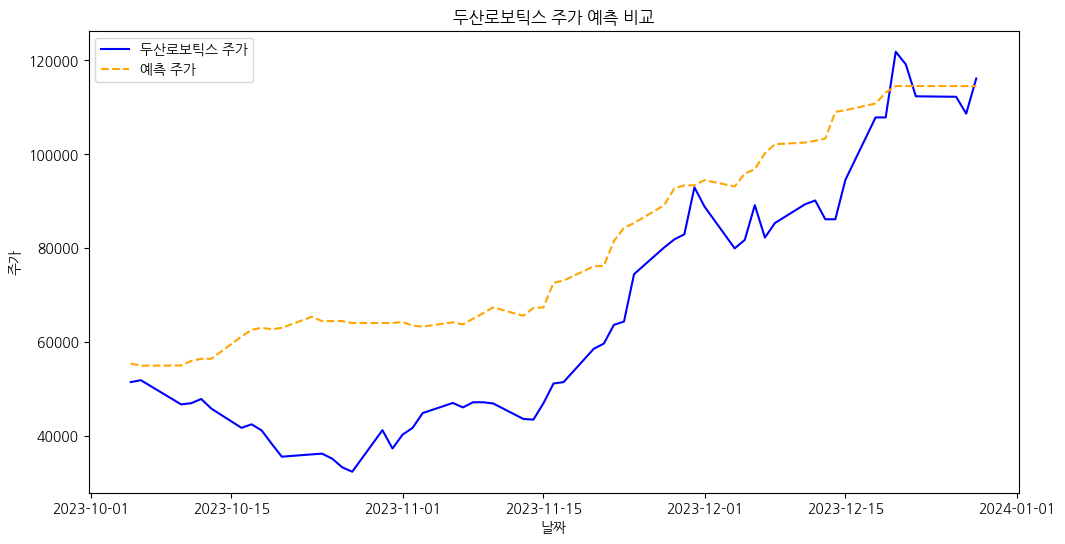

In [26]:
import random
import koreanize_matplotlib
from datetime import datetime, timedelta

company = "두산로보틱스"

sentiment_result = pd.read_csv("../data/project/predicted_두산로보틱스_2023.csv") # 감성분석 결과 csv파일 읽어오기

sentiment_result['date'] = pd.to_datetime(sentiment_result['date'])
sentiment_result["date"] = sentiment_result["date"].dt.date

sentiments_data = []

for index, row in sentiment_result.iterrows():
    date = row['date']
    prediction = row['prediction']
    score = row['score']
    sentiments_data.append([date, company, prediction, score])

sentiments_df2 = pd.DataFrame(sentiments_data, columns=['date', 'company', 'prediction', 'score'])

# 감성에 따른 가중치 매핑
weights = {'호재': 1, '악재': -1, '중립': 0}
sentiments_df2['total'] = sentiments_df2['prediction'].map(weights) * sentiments_df2['score']

df_ds = sentiments_df2.groupby(['date', 'company']).agg({'total': 'sum'}).reset_index()
df_ds['date'] = pd.to_datetime(df_ds['date'])
df_ds = df_ds.set_index('date')

# 주가 데이터에 감성분석 결과 총점을 추가
ds_stock = fdr.DataReader('454910', '2023-01-01', '2023-12-31')
ds_stock['Sentiment_Total'] = df_ds['total']
ds_stock['Sentiment_Total'] = ds_stock['Sentiment_Total'].fillna(0)

# 감성분석 결과 Scaling
scaling_factor = 73
ds_stock['Sentiment_Total'] = ds_stock['Sentiment_Total'] * scaling_factor

# 누적 합 계산
ds_stock['Sentiment_Total_Cumulative'] = ds_stock['Sentiment_Total'].cumsum()

# 오프셋 설정
offset = 51400
ds_stock['Sentiment_Total_Cumulative_Offset'] = ds_stock['Sentiment_Total_Cumulative'] + offset

plt.figure(figsize=(12, 6))
plt.plot(ds_stock['Close'], label='두산로보틱스 주가', color='blue')
plt.plot(ds_stock['Sentiment_Total_Cumulative_Offset'], label='예측 주가', linestyle='--', color='orange')
plt.title('두산로보틱스 주가 예측 비교')
plt.xlabel('날짜')
plt.ylabel('주가')
plt.legend()
plt.show()

### 감성분석 결과 기반 경향선과 주가 데이터 최적경향선 비교

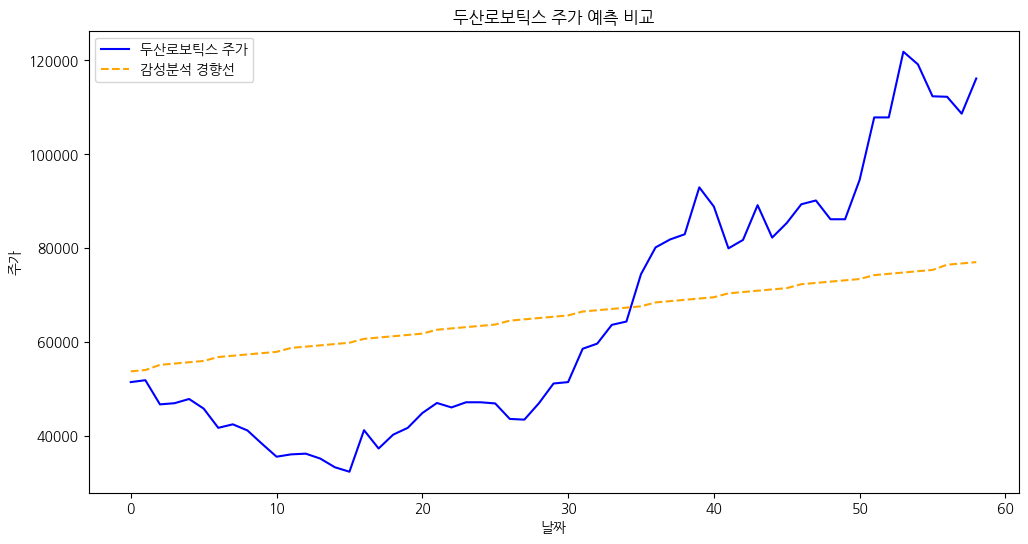

In [53]:
import FinanceDataReader as fdr
import seaborn as sns
import matplotlib.pyplot as plt

ds_stock = fdr.DataReader('454910', '2023-01-01', '2023-12-31')

# 감성분석 결과의 크기를 조절
scaling_factor = 73
df_ds['Sentiment_Total'] = df_ds['total'] * scaling_factor

ds_stock = ds_stock.sort_index()
df_ds = df_ds.sort_index()

# 날짜를 일로 나타내는 정수로 변환
ds_stock['Date_Integer'] = (ds_stock.index - ds_stock.index.min()).days
df_ds['Date_Integer'] = (df_ds.index - df_ds.index.min()).days

# 주식 데이터와 감성분석 결과 날짜기준 병합
merged_data = pd.merge(ds_stock, df_ds, left_on='Date_Integer', right_on='Date_Integer', how='left')

# 결측치 처리
merged_data['Sentiment_Total'] = merged_data['Sentiment_Total'].fillna(0)

# 감성분석 결과기반 1차 함수의 계수 및 y값 계산
coeff = np.polyfit(merged_data['Date_Integer'], merged_data['Sentiment_Total'].cumsum(), 1)
merged_data['Sentiment_Linear'] = np.polyval(coeff, merged_data['Date_Integer'])

# 오프셋 설정
offset = merged_data['Close'].mean() - merged_data['Sentiment_Linear'].iloc[len(merged_data) // 2]
merged_data['Sentiment_Linear_Offset'] = merged_data['Sentiment_Linear'] + offset

plt.figure(figsize=(12, 6))
plt.plot(merged_data['Close'], label='두산로보틱스 주가', color='blue')
plt.plot(merged_data['Sentiment_Linear_Offset'], label='감성분석 경향선', linestyle='--', color='orange')
plt.title('두산로보틱스 주가 예측 비교')
plt.xlabel('날짜')
plt.ylabel('주가')
plt.legend()
plt.show()


In [52]:
import pandas as pd
import cufflinks as cf
import numpy as np
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")
cf.set_config_file(theme='pearl', world_readable=False)
cf.go_offline()
single_stock = fdr.DataReader('454910', '2023-01-01', '2023-12-31')
single_stock['Close'].iplot(title='두산로보틱스 최적경향선', bestfit=True, bestfit_colors=['blue']) # 수익률 시각화, bestfit:최적 경향선 추가(추세 파악 용이)